## Portfolio 3.Planning the travel route in 11 cities 🗺


Portfolio 3 is a comparsion of the route planning by using Traveling salesman problem and Nearest Neighbor Method and the minimum route of Nearest Neighbor Method on the 11 cities, finally visualize the route on the map by folium. 


The cities including:

**1**.**Xi'an, Shannxi, China**

**2**.**Jingdezhen, Jiangxi, China**

**3**.**Nanjing, Jiangsu, China** 

**4**.**Chengdu, Sichuan, China** 

**5**.**Chongqing, Sichuan, China** 

**6**.**Seoul Special City, Korea**

**7**.**Pusan, Korea** 

**8**.**Singapore**

**9**.**Nara-ken, Japan**

**10**.**Tokyo, Japan**

**11**.**Kobe, Japan** 







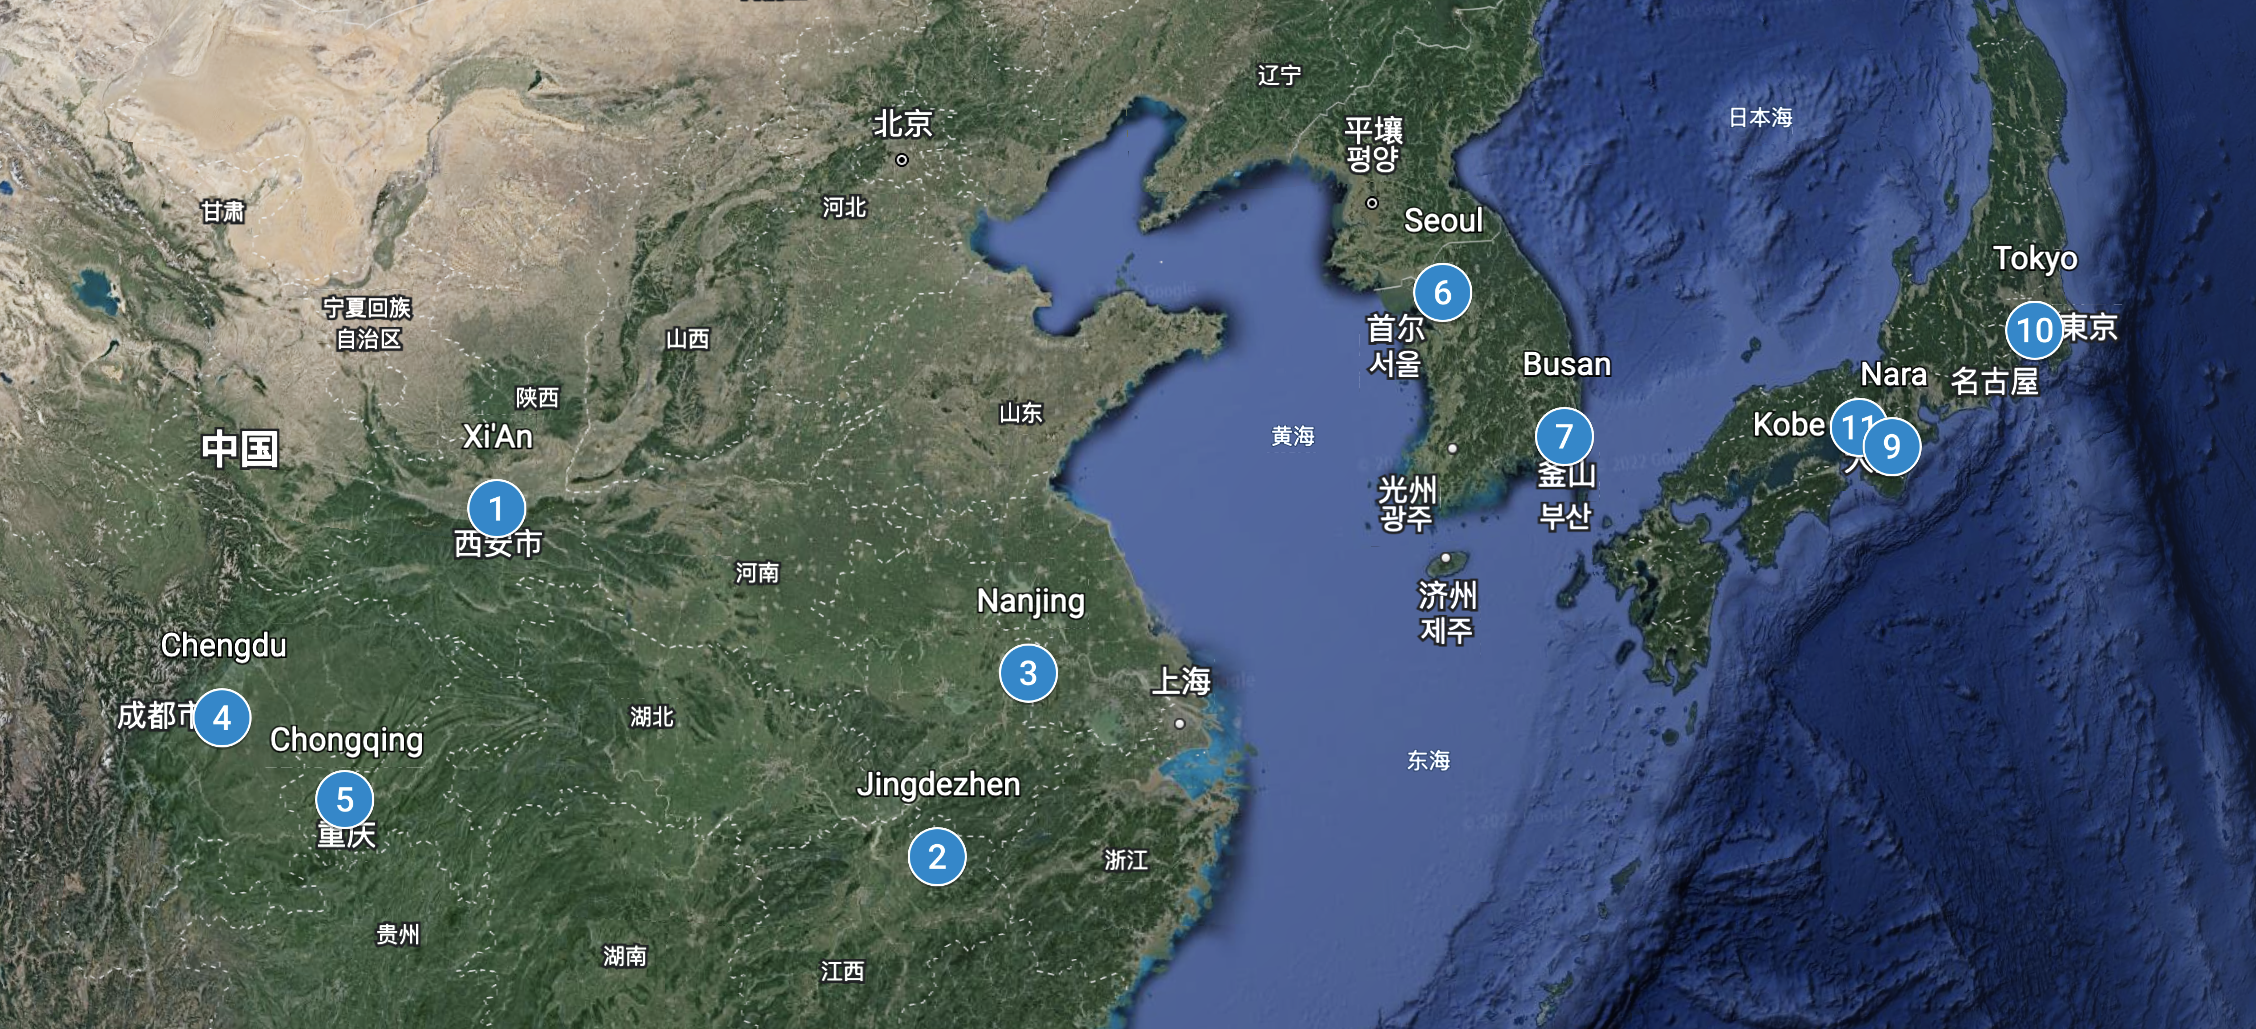

In [164]:
!pip install ortools

In [165]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import math
from geopy.distance import geodesic #distance package
from pandas import *
import pandas as pd
import scipy.linalg as la
import folium
from folium import plugins
from scipy.optimize import linprog

### Distance Matrix
The distance matrix is the distance between each cities, which is a n by n matrix, assuming n is the number of target city. For calculating the distance by python, I use a Geography package called **Geopy**, and use its geogpy.distance to get the data by input the latitude and longtitude matrix. It will return the shortest path between the vertices city in kilometer.

- Reference: $\href{https://pypi.org/project/geopy/}{geopy}$

### Example of creating distance matrix

The data "coordinates" are the coordinate of 12 cities in South America, it is in the form of [Latitude, Longtitude]. \
The information is from $\href{https://www.google.com/maps/d/edit?mid=1ZiruRXCcdUfy8310b_LkCY1DeOGhrRM&usp=share_link}{Example\ coordinate\ source} $. 

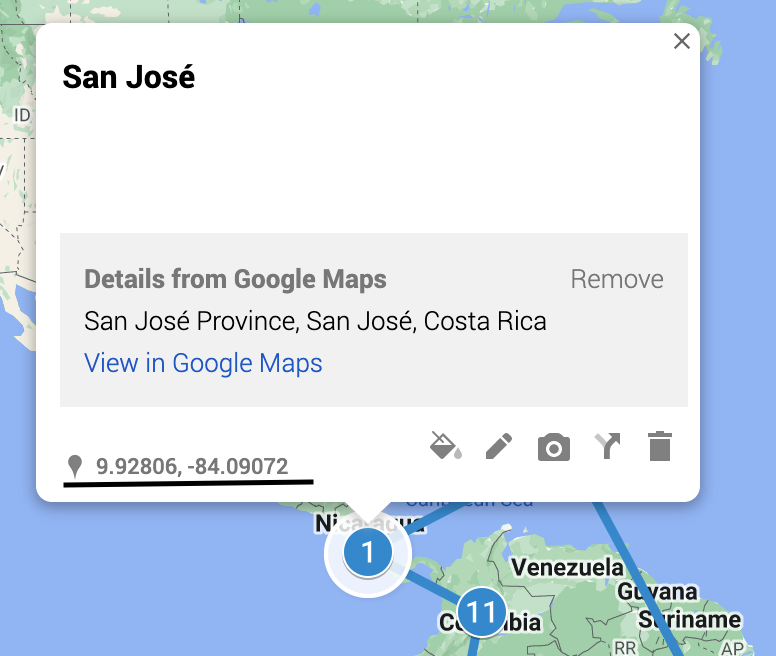

In [4]:
# The corrdinates of the cities (total 12)
coordinates = np.array([[9.92806, -84.09072],
                        [-30.03681, -51.20898],
                        [-25.43723, -49.26997],
                        [-22.90684, -43.17289],
                        [-34.60368, -58.38155],
                        [-32.9587, -60.69304],
                        [-33.44888, -70.66926],
                        [-12.04637, -77.04275],
                        [18.46705, -66.11845],
                        [-23.55577, -46.63955],
                        [4.71098, -74.07209],
                        [-25.26373, -57.57592]])

#distance calucator geodesic : returns the shortest path between the vertices city in kilometer
def getDistance(cityA, cityB):
    distance = geodesic(cityA, cityB).km
    return distance

#distance matrix 
def getdismat(coordinates, num_city):
    dismat = np.zeros((num_city, num_city)) #n by n matrix, n is the number of city
    for i in range(num_city):
        for j in range(i, num_city):
            dismat[i][j] = dismat[j][i] = getDistance(coordinates[i],coordinates[j]) 
    return dismat

D = getdismat(coordinates, 12)

D

array([[   0.        , 5652.6627128 , 5436.23301072, 5751.24706397,
        5625.50120905, 5356.3477914 , 5006.69984204, 2552.11134173,
        2155.41963604, 5507.75460145, 1247.29006076, 4840.09367551],
       [5652.6627128 ,    0.        ,  544.34781515, 1124.50279428,
         843.75721544,  957.04305631, 1879.39159702, 3328.09723538,
        5600.0493688 ,  849.53026902, 4552.98951348,  820.96686378],
       [5436.23301072,  544.34781515,    0.        ,  679.88640037,
        1342.16156386, 1387.3570866 , 2252.3536862 , 3271.72280813,
        5188.67585246,  338.379867  , 4279.10947448,  836.17816614],
       [5751.24706397, 1124.50279428,  679.88640037,    0.        ,
        1967.08326037, 2048.20885157, 2930.10434825, 3781.61698146,
        5213.11614872,  361.99656243, 4541.1930323 , 1486.85126462],
       [5625.50120905,  843.75721544, 1342.16156386, 1967.08326037,
           0.        ,  281.27825319, 1141.33004936, 3131.42877485,
        5930.1812907 , 1672.60354066, 4652.6

### Get the distance matrix of travel city
- The latitude and longtitude is from google my map: $\href{https://www.google.com/maps/d/edit?mid=1GQG78AQ34S7dPEueco9-Fo-nIyLIvDk&usp=sharing}{Travel \ City \ Map }$ 
- File: "3_LP Data.csv" is the information of latitude Longtitude and City name 

In [142]:
# read csv
def get_coord(csv_name):
    
    data = read_csv(csv_name) 

    #get the list of lat and long
    latitude = data['latitude'].tolist() 
    Longtitude = data['Longtitude'].tolist() 

    #convert list to array
    lat = np.array(latitude) 
    long = np.array(Longtitude)

    #number of city
    n = len(lat) 

    #reshape to n*1 array for getting the coordinate array n*2
    a = lat.reshape(n,1) 
    b = long.reshape(n,1)

    #input of function getdismat by using dstack 
    coordinate = np.dstack((a,b)) # [a,b] = [Latitude, Longtitude]
    
    return coordinate 

get_coord("3_LP Data.csv")

array([[[ 34.26581, 108.95409]],

       [[ 29.26868, 117.17838]],

       [[ 32.05837, 118.79647]],

       [[ 30.57225, 104.0665 ]],

       [[ 29.56568, 106.55118]],

       [[ 37.56653, 126.97796]],

       [[ 35.17955, 129.07564]],

       [[  1.35208, 103.81983]],

       [[ 34.29755, 135.82797]],

       [[ 35.67619, 139.65031]],

       [[ 34.69008, 135.19563]]])

In [8]:
#get the distance matrix of travel city
C = getdismat(coordinate, 11)
C

array([[   0.        ,  955.45608996,  949.74524469,  615.56624279,
         568.5158106 , 1664.70002128, 1842.6802941 , 3682.61232132,
        2467.21528819, 2796.17872966, 2404.2604674 ],
       [ 955.45608996,    0.        ,  345.96145622, 1273.60373203,
        1031.48316407, 1293.76001758, 1297.52906739, 3398.92445245,
        1849.07316705, 2222.72444051, 1802.71247177],
       [ 949.74524469,  345.96145622,    0.        , 1410.65016698,
        1203.15516075,  965.60242723, 1014.10924289, 3744.85276139,
        1605.77233216, 1966.84712093, 1551.85455014],
       [ 615.56624279, 1273.60373203, 1410.65016698,    0.        ,
         264.27231358, 2245.62272413, 2388.76365028, 3234.15082003,
        3003.12910526, 3350.04024689, 2944.71256771],
       [ 568.5158106 , 1031.48316407, 1203.15516075,  264.27231358,
           0.        , 2087.94067554, 2203.68206975, 3135.85059234,
        2807.67428899, 3163.64967476, 2752.16083256],
       [1664.70002128, 1293.76001758,  965.6024272

### TSP method
Code Source: Class note Oct 20, 2022, Connectivity Constraints for TSP Optimal Solutions with ILP Scheduling
- replaced the **cost_matrix** by **getdismat**

In [48]:
def tour_cost(C,tour):
    n = len(tour)
    cost = 0
    for i in range(n-1):
        cost += C[tour[i],tour[i+1]]
    cost += C[tour[-1],tour[0]]
    return cost


def constraintsTSP(n):
    A1 = np.hstack([np.insert(np.zeros((n-1,n-1)),k,1,axis=0) for k in range(n)])
    A2 = np.hstack([np.insert(np.eye(n-1),k,0,axis=0) for k in range(n)])
    A_eq = np.hstack([np.vstack([A1,A2]),np.zeros((2*n,n))])
    b_eq = np.ones(2*n)
    A4 = np.vstack([np.insert(np.diag(-np.ones(n-1)),k,np.ones(n-1),axis=1) for k in range(n)])
    A5 = np.hstack([n*np.eye(n*(n-1)),A4])
    indices = [k for k in range(0,n*(n-1)) if k==0 or (k%(n-1) != 0)]
    last = np.zeros(n**2)
    last[n**2 - n] = 1
    A_ub = np.vstack([A5[indices,:],last])
    b_ub = np.append((n-1)*np.ones((n-1)**2),0)
    return A_eq,b_eq,A_ub,b_ub


def solveTSP_ILP(V):
    n = V.shape[0]
    C = getdismat(V,n)
    c = np.zeros((n,n-1))
    for i in range(n):
        indices = list(range(n))
        indices.remove(i)
        c[i,:] = np.vstack([C[i,indices]])
    A_eq,b_eq,A_ub,b_ub = constraintsTSP(n)
    c = np.hstack([c.flatten(),np.zeros(n)])
    solution = linprog(c,A_ub=A_ub,b_ub=b_ub,A_eq=A_eq[:-1],b_eq=b_eq[:-1],integrality=np.ones(n**2))
    optimal_tour = [0 for k in range(n)]
    for i in range(n):
        index = round(solution.x[n**2 - n + i])
        optimal_tour[index] = i
    optimal_cost = tour_cost(C,optimal_tour)
    return optimal_tour,optimal_cost

TSP_optimal_tour, TSP_optimal_cost = solveTSP_ILP(coordinate)
print(TSP_optimal_tour)
print(TSP_optimal_cost)

[0, 5, 9, 8, 10, 6, 2, 1, 7, 4, 3]
12606.490017529271


### Result of TSP Method
Finally, the route designed by TSP would be from strating city Xi'an -> Seoul -> Tokyo -> Nara -> Kobe -> Busan -> Nanjing -> Jingdezhen -> Singapore -> Chongqing -> Chengdu.

The route created is a one-way trip without crossings, and the total travel distance is about 12606.50km.

## The Route Planning by Nearest Neighbor Method

Nearest_neighbor and tour_cost code Source: Class note Oct 11, 2022, Travelling Salesperson Problem (TSP),Brute Force, Nearest Neighbor
- replaced the **cost_matrix** by **getdismat**

In [151]:
def tour_cost(C,tour):
    n = len(tour)
    cost = 0
    for i in range(n-1):
        cost += C[tour[i],tour[i+1]]
    cost += C[tour[-1],tour[0]]
    return cost

def nearest_neighbor(V,start=0):
    n = V.shape[0]
    C = getdismat(V,n)
    tour = [start]
    nodes = list(range(n))
    nodes.remove(start)
    for i in range(1,n):
        next_i = np.argmin(C[tour[-1],nodes])
        next_node = nodes[next_i]
        tour.append(next_node)
        nodes.pop(next_i)
    cost = tour_cost(C,tour)
    return tour,cost


In [152]:
# Result staring from 0
NN_optimal_tour, NN_optimal_cost = nearest_neighbor(coordinate, 0)
print(NN_optimal_tour)
print(NN_optimal_cost)

[0, 4, 3, 1, 2, 5, 6, 10, 8, 9, 7]
13743.980198456953


### Created a function to show the result of minimum cost of Nearest Neighbor

In [168]:
# Result of min distance route, no limitation of starting city
def min_cost_route(coordiante):
    
    # list to store all the cost
    NN_min_cost = [] 
    n = coordiante.shape[0]
    
    #store cost
    for i in range(n):
        optimal_tour, optimal_cost = nearest_neighbor(coordinate, i)
        NN_min_cost.append(optimal_cost)
        optimal_tour = []
        optimal_cost = 0
    
    #c stores is the index of the starting city which has the least total distance
    c = NN_min_cost.index(min(NN_min_cost))
    
    tour,cost = nearest_neighbor(coordinate, c)
    
    return tour,cost

coord = get_coord("3_LP Data.csv")

min_nn_tour, min_nn_cost = min_cost_route(coord)
print(min_nn_tour)
print(min_nn_cost)

[9, 8, 10, 6, 5, 2, 1, 0, 4, 3, 7]
12977.37105508432


## Visualization on Folium

Reference article:

- [Article about Folium](https://https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94)

- [Flight line on Folium](https://https://nbviewer.org/github/python-visualization/folium/blob/main/examples/PolyLineTextPath_AntPath.ipynb)

In [51]:
location = "3_LP Data.csv"
travel_locations = pd.read_csv(location)
travel_locations 

City  latitude  Longtitude
0        Xi'an, Shannxi, China  34.26581   108.95409
1   Jingdezhen, Jiangxi, China  29.26868   117.17838
2      Nanjing, Jiangsu, China  32.05837   118.79647
3      Chengdu, Sichuan, China  30.57225   104.06650
4    Chongqing, Sichuan, China  29.56568   106.55118
5    Seoul Special City, Korea  37.56653   126.97796
6                 Pusan, Korea  35.17955   129.07564
7                    Singapore   1.35208   103.81983
8              Nara-ken, Japan  34.29755   135.82797
9                 Tokyo, Japan  35.67619   139.65031
10                 Kobe, Japan  34.69008   135.19563

### Create map on folium
- TSP route: TSP_map
- Nearest Neighbor route: NN_map

In [111]:
travel_locations = travel_locations[["latitude", "Longtitude", "City"]] #read the latitude, Longtitude and the City

In [159]:
#create the map in the central area of the cities with mean of latitude and Longtitude
TSP_map = folium.Map(location=[travel_locations.latitude.mean(), travel_locations.Longtitude.mean()], zoom_start=5, control_scale=True)

NN_map = folium.Map(location=[travel_locations.latitude.mean(), travel_locations.Longtitude.mean()], zoom_start=5, control_scale=True)

NN_Min_map = folium.Map(location=[travel_locations.latitude.mean(), travel_locations.Longtitude.mean()], zoom_start=5, control_scale=True)


In [161]:
#plot the point in each map
#TSP
for index, location_info in travel_locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["Longtitude"]], popup=location_info["City"]).add_to(TSP_map)
    
#NN
for index, location_info in travel_locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["Longtitude"]], popup=location_info["City"]).add_to(NN_map)
    
for index, location_info in travel_locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["Longtitude"]], popup=location_info["City"]).add_to(NN_Min_map)

### Get the coordinates matrix to make the airline in the map
- Since the folium.PolyLine needs the coordinate in the order of the trip to get the travel line

#### Test

In [107]:
def Change_coordinate_test(optimal_tour):
    n = len(optimal_tour)
    c = np.zeros((n,2))
    for num in optimal_tour:
        i = optimal_tour.index(num) # i is the city index in the optimal order
        print(num)
        print("i = ") 
        print(i)
        print("c = ") 
        print(c)
        row = i
        c[i][0] = lat[num] #c: number of city * 2 matrix, take the city order in the result, records the lat and long for each city.
        c[i][1] = long[num]
    return c

NN_order_test = Change_coordinate_test(NN_optimal_tour)

print(NN_order_test)

0
i = 
0
c = 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
4
i = 
1
c = 
[[ 34.26581 108.95409]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]]
3
i = 
2
c = 
[[ 34.26581 108.95409]
 [ 29.56568 106.55118]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]]
1
i = 
3
c = 
[[ 34.26581 108.95409]
 [ 29.56568 106.55118]
 [ 30.57225 104.0665 ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]]
2
i = 
4
c = 
[[ 34.26581 108.95409]
 [ 29.56568 106.55118]
 [ 30.57225 104.0665 ]

### Process

In [129]:
def Change_coordinate(optimal_tour):
    n = len(optimal_tour)
    c = np.zeros((n,2))
    for num in optimal_tour:
        i = optimal_tour.index(num) # i is the city index in the optimal order
        row = i
        c[i][0] = lat[num] #c: number of city * 2 matrix, take the city order in the result, records the lat and long for each city.
        c[i][1] = long[num]
    return c

In [158]:
TSP_order = Change_coordinate(TSP_optimal_tour)
NN_order = Change_coordinate(NN_optimal_tour)
NN_min_order = Change_coordinate(min_nn_tour)

print("TSP order coordinates: ")
print(TSP_order)


print("-----------------------")

print("Nearest Neighbor order coordinates: ")
print(NN_order)


print("-----------------------")
print("Nearest Neighbor Minimum Distance order coordinates: ")
print(NN_min_order)


TSP order coordinates: 
[[ 34.26581 108.95409]
 [ 37.56653 126.97796]
 [ 35.67619 139.65031]
 [ 34.29755 135.82797]
 [ 34.69008 135.19563]
 [ 35.17955 129.07564]
 [ 32.05837 118.79647]
 [ 29.26868 117.17838]
 [  1.35208 103.81983]
 [ 29.56568 106.55118]
 [ 30.57225 104.0665 ]]
-----------------------
Nearest Neighbor order coordinates: 
[[ 34.26581 108.95409]
 [ 29.56568 106.55118]
 [ 30.57225 104.0665 ]
 [ 29.26868 117.17838]
 [ 32.05837 118.79647]
 [ 37.56653 126.97796]
 [ 35.17955 129.07564]
 [ 34.69008 135.19563]
 [ 34.29755 135.82797]
 [ 35.67619 139.65031]
 [  1.35208 103.81983]]
-----------------------
Nearest Neighbor Minimum Distance order coordinates: 
[[ 35.67619 139.65031]
 [ 34.29755 135.82797]
 [ 34.69008 135.19563]
 [ 35.17955 129.07564]
 [ 37.56653 126.97796]
 [ 32.05837 118.79647]
 [ 29.26868 117.17838]
 [ 34.26581 108.95409]
 [ 29.56568 106.55118]
 [ 30.57225 104.0665 ]
 [  1.35208 103.81983]]


### Add the flight line to the map we create

We can see the route from the map as the direction of plane.



In [120]:
def add_lines(order, method_map):
    plane_line = folium.PolyLine(order,weight=1,color="black",).add_to(method_map)
    attr = {"font-weight": "bold", "font-size": "24"}
    plugins.PolyLineTextPath(plane_line, "\u2708     ", repeat=True, offset= 9, attributes=attr).add_to(method_map)

### TSP order map

In [125]:
add_lines(TSP_order, TSP_map)

In [126]:
TSP_map

### Nearest Neighbor order map

In [127]:
add_lines(NN_order, NN_map)

In [128]:
NN_map

## Nearest Neighbor Minimum Distance order map

In [163]:
add_lines(NN_min_order, NN_Min_map)
NN_Min_map

## Result

|                       | Distance(km) | Crossings | Distance back(km) |
|-----------------------|--------------|-----------|-------------------|
| TSP                   | 12606.49     | No        | 893               |
| Nearest Neighbor      | 13743.98     | YES       | 3703              |
| Nearest Neighbor(min) | 12977.37     | No        | 5317              |

From the result table, it is noticeable that TSP has the shortest total distance and the distance back (from the last node to the start node). If we use the route planned by Nearest Neighbor with the index 0 city, there exsits the crossings of the first two city visit. For the minimum result of Nearest Neighbor route, it is a one-way trip which has no circle back as the TSP. Therefore, the distance between last city and starting city has the largest distance in comnparsion with other methods. In the trip, the travel plan would use the TSP route.